<a href="https://colab.research.google.com/github/millaoktavia/Dataset/blob/main/Copy_of_mamdani_haberman.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Import Library

In [ ]:
#Impor Library SK - Fuzzy
import numpy as np
import matplotlib.pyplot as plt
import warnings
import pandas as pd
from sklearn.preprocessing import PolynomialFeatures

warnings.filterwarnings('ignore')

# Read Data

In [ ]:
df=pd.read_excel('haberman.xlsx')
df

age  tahun  axillary  status
0     30     64         1       1
1     30     62         3       1
2     30     65         0       1
3     31     59         2       1
4     31     65         4       1
..   ...    ...       ...     ...
300   74     63         0       1
301   75     62         1       1
302   76     67         0       1
303   77     65         3       1
304   78     65         1       2

[305 rows x 4 columns]

## Cek Missing Value

In [ ]:
df.isnull().sum()

age         0
tahun       0
axillary    0
status      0
dtype: int64

## Tipe Data

In [ ]:
df.dtypes

age         int64
tahun       int64
axillary    int64
status      int64
dtype: object

# Data Preprocessing

In [ ]:
df=df.drop(columns=['tahun'])
df

age  axillary  status
0     30         1       1
1     30         3       1
2     30         0       1
3     31         2       1
4     31         4       1
..   ...       ...     ...
300   74         0       1
301   75         1       1
302   76         0       1
303   77         3       1
304   78         1       2

[305 rows x 3 columns]

In [ ]:
df['status'].value_counts()

1    225
2     80
Name: status, dtype: int64

## Deskripsi Data

In [ ]:
df.describe()

age    axillary      status
count  305.000000  305.000000  305.000000
mean    52.357377    4.032787    1.262295
std     10.678010    7.200528    0.440605
min     30.000000    0.000000    1.000000
25%     44.000000    0.000000    1.000000
50%     52.000000    1.000000    1.000000
75%     60.000000    4.000000    2.000000
max     78.000000   52.000000    2.000000

https://dkk.sukoharjokab.go.id/read/kanker-payudara-part-2

https://www.sehatq.com/artikel/penjelasan-stadium-kanker-payudara

# Fungsi Segitiga

In [ ]:
def fungsi_segitiga(x, amb):
    """
    Fungsi Keanggotaan Segitiga.
    Parameter:
    ----------
    x   : Array 1 dimensi, semesta himpunan x  
    amb : Array 1 dimensi, terdiri dari 3 elemen a, m, b, yang mana a<=m<=b
    
    Hasil
    -------
    miu   : Array 1 dimensi fungsi keanggotaan segitiga 
    
    Fungsi keanggotaan segitiga:
    """
    assert len(amb) == 3, 'parameter amb harus tepat tiga elemen'
    a, m, b = np.r_[amb]    # Zero-indexing di Python
    assert a <= m and m <= b, 'paremeter harus memenuhi syarat berikut: a <= m <= b.'

    miu = np.zeros(len(x))

    # Sisi Kiri
    if a != m:
        idx = np.nonzero(np.logical_and(a < x, x < m))[0]
        miu[idx] = (x[idx] - a) / float(m - a)

    # Sisi Kanan
    if m != b:
        idx = np.nonzero(np.logical_and(m < x, x < b))[0]
        miu[idx] = (b - x[idx]) / float(b - m)

    idx = np.nonzero(x == m)
    miu[idx] = 1
    
    return miu

# Miu Fungsi

In [ ]:
def miu_fungsi_segitiga(array_x, amb, x_i):
    """
    Fungsi Keanggotaan Segitiga.
    Parameter:
    ----------
    x   : Array 1 dimensi, semesta himpunan x  
    amb : Array 1 dimensi, terdiri dari 3 elemen a, m, b, yang mana a<=m<=b
    
    Hasil
    -------
    miu   : Array 1 dimensi fungsi keanggotaan segitiga 
    
    Fungsi keanggotaan segitiga:
    """
    assert len(amb) == 3, 'parameter amb harus tepat tiga elemen'
    a, m, b = np.r_[amb]    # Zero-indexing di Python
    assert a <= m and m <= b, 'paremeter harus memenuhi syarat berikut: a <= m <= b.'

    miu = np.zeros(len(array_x))

    # Sisi Kiri
    if a != m:
        idx = np.nonzero(np.logical_and(a < array_x, array_x < m))[0]
        miu[idx] = (array_x[idx] - a) / float(m - a)

    # Sisi Kanan
    if m != b:
        idx = np.nonzero(np.logical_and(m < array_x, array_x < b))[0]
        miu[idx] = (b - array_x[idx]) / float(b - m)

    idx = np.nonzero(array_x == m)
    miu[idx] = 1

    dict_fuzzy=res = {round(array_x[i],2): miu[i] for i in range(len(array_x))}
    print(dict_fuzzy)
    hasil = dict_fuzzy[int(x_i)]

    return hasil

# Pembentukan Himpunan Fuzzy

## age

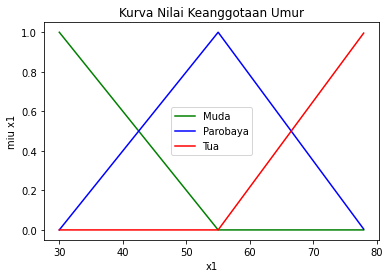

In [ ]:
# Pembentukan Himpunan Fuzzy PM10 [fungsi buat sendiri]
x_age = np.arange(30, 78, 0.1) # Semesta Pembicaraan
amb_age_muda = [30, 30, 55]
amb_age_parobaya = [30, 55, 78]
amb_age_tua = [55, 78, 78]

miu_age_muda = fungsi_segitiga(x_age, amb_age_muda)
miu_age_parobaya = fungsi_segitiga(x_age, amb_age_parobaya)
miu_age_tua = fungsi_segitiga(x_age, amb_age_tua)

import matplotlib.pyplot as plt
plt.plot(x_age, miu_age_muda, label = "Muda", color='green')
plt.plot(x_age, miu_age_parobaya, label = "Parobaya", color='blue')
plt.plot(x_age, miu_age_tua, label = "Tua", color='red')
plt.xlabel('x1')
plt.ylabel('miu x1')
plt.title('Kurva Nilai Keanggotaan Umur')
plt.legend()
plt.show()

## axillary

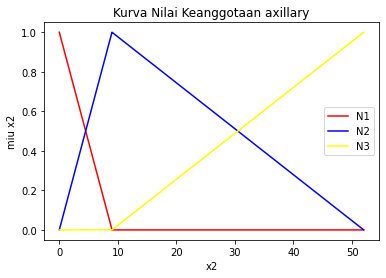

In [ ]:
# Pembentukan Himpunan Fuzzy PM25 [fungsi buat sendiri]
x_axillary= np.arange(0, 52, 0.01) # Semesta Pembicaraan
amb_axillary_N1 = [0, 0, 9]
amb_axillary_N2 = [0, 9, 52]
amb_axillary_N3 = [9, 52, 52]

miu_axillary_N1 = fungsi_segitiga(x_axillary, amb_axillary_N1)
miu_axillary_N2 = fungsi_segitiga(x_axillary, amb_axillary_N2)
miu_axillary_N3 = fungsi_segitiga(x_axillary, amb_axillary_N3)

import matplotlib.pyplot as plt
#plt.plot(x_PM25, miu_PM25_baik, label = "Baik", color='green')
plt.plot(x_axillary, miu_axillary_N1, label = "N1", color='red')
plt.plot(x_axillary, miu_axillary_N2, label = "N2", color='blue')
plt.plot(x_axillary, miu_axillary_N3, label = "N3", color='yellow')
plt.xlabel('x2')
plt.ylabel('miu x2')
plt.title('Kurva Nilai Keanggotaan axillary')
plt.legend()
plt.show()

## status

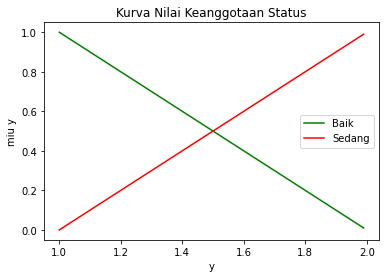

In [ ]:
# Pembentukan Himpunan Fuzzy categori [fungsi buat sendiri]
x_status = np.arange(1, 2, 0.01) # Semesta Pembicaraan
amb_status_hidup = [1, 1, 2]
amb_status_meninggal = [1, 2, 2]

miu_status_hidup = fungsi_segitiga(x_status, amb_status_hidup)
miu_status_meninggal = fungsi_segitiga(x_status, amb_status_meninggal)

import matplotlib.pyplot as plt
plt.plot(x_status, miu_status_hidup, label = "Baik", color='green')
plt.plot(x_status, miu_status_meninggal, label = "Sedang", color='red')
plt.xlabel('y')
plt.ylabel('miu y')
plt.title('Kurva Nilai Keanggotaan Status')
plt.legend()
plt.show()

# Fuzzifikasi

## age

In [ ]:
def fuzzyfikasi1(x_array, amd_1, amd_2, amd_3, x, label_1, label_2, label_3):
    batas = (max(x_array)+min(x_array))/2
    awal = batas-19
    akhir = batas+1
    print(batas)
    hasil=0
    if x <= awal:
        hasil=miu_fungsi_segitiga(x_array, amd_1, x)
        label_hasil = label_1
    elif awal <= x <= akhir: 
        hasil=miu_fungsi_segitiga(x_array, amd_2, x)
        label_hasil = label_2
    else:
        hasil=miu_fungsi_segitiga(x_array, amd_3, x)
        label_hasil = label_3
    return hasil, label_hasil

In [ ]:
x_age = np.arange(30, 79, 0.1) # Semesta Pembicaraan
amb_age_muda = [30, 32.5, 35]
amb_age_parobaya = [35, 45, 55]
amb_age_tua = [55, 66.5, 78]

fuzzifikasi_age=[]
miu_age=[]
for i in df.age:
    hasil=fuzzyfikasi1(x_age, amb_age_muda, amb_age_parobaya, amb_age_tua, i, "Muda", "Parobaya", "Tua")
    fuzz = hasil[1]
    m = hasil[0]
    fuzzifikasi_age.append(fuzz)
    miu_age.append(m)
    
len(fuzzifikasi_age)

54.450000000000344
{30.0: 0.0, 30.1: 0.04000000000000057, 30.2: 0.08000000000000114, 30.3: 0.1200000000000017, 30.4: 0.16000000000000228, 30.5: 0.20000000000000284, 30.6: 0.2400000000000034, 30.7: 0.28000000000000397, 30.8: 0.32000000000000456, 30.9: 0.3600000000000051, 31.0: 0.4000000000000057, 31.1: 0.4400000000000063, 31.2: 0.4800000000000068, 31.3: 0.5200000000000073, 31.4: 0.5600000000000079, 31.5: 0.6000000000000085, 31.6: 0.6400000000000091, 31.7: 0.6800000000000097, 31.8: 0.7200000000000102, 31.9: 0.7600000000000108, 32.0: 0.8000000000000114, 32.1: 0.840000000000012, 32.2: 0.8800000000000125, 32.3: 0.920000000000013, 32.4: 0.9600000000000136, 32.5: 0.9999999999999858, 32.6: 0.9599999999999852, 32.7: 0.9199999999999846, 32.8: 0.8799999999999841, 32.9: 0.8399999999999835, 33.0: 0.799999999999983, 33.1: 0.7599999999999824, 33.2: 0.7199999999999818, 33.3: 0.6799999999999813, 33.4: 0.6399999999999807, 33.5: 0.5999999999999801, 33.6: 0.5599999999999795, 33.7: 0.5199999999999789, 33.8

305

## axillary

In [ ]:
def fuzzyfikasi2(x_array, amd_1, amd_2, amd_3, x, label_1, label_2, label_3):
    batas = (max(x_array)+min(x_array))/2
    awal = batas-23
    akhir = batas-17

    hasil=0
    if x <= awal:
        hasil=miu_fungsi_segitiga(x_array, amd_1, x)
        label_hasil = label_1
    elif awal <= x <= akhir: 
        hasil=miu_fungsi_segitiga(x_array, amd_2, x)
        label_hasil = label_2
    else:
        hasil=miu_fungsi_segitiga(x_array, amd_3, x)
        label_hasil = label_3
    return hasil, label_hasil

In [ ]:
x_axillary= np.arange(0, 53, 0.1) # Semesta Pembicaraan
amb_axillary_N1 = [0, 1.5, 3]
amb_axillary_N2 = [4, 6.5, 9]
amb_axillary_N3 = [10, 31, 52]

fuzzifikasi_axillary=[]
miu_axillary=[]
for i in df.axillary:
    hasil=fuzzyfikasi2(x_axillary, amb_axillary_N1, amb_axillary_N2, amb_axillary_N3, i, "N1", "N2", "N3")
    fuzz = hasil[1]
    m = hasil[0]
    fuzzifikasi_axillary.append(fuzz)
    miu_axillary.append(m)
    
len(fuzzifikasi_axillary)

{0.0: 0.0, 0.1: 0.06666666666666667, 0.2: 0.13333333333333333, 0.3: 0.20000000000000004, 0.4: 0.26666666666666666, 0.5: 0.3333333333333333, 0.6: 0.4000000000000001, 0.7: 0.46666666666666673, 0.8: 0.5333333333333333, 0.9: 0.6, 1.0: 0.6666666666666666, 1.1: 0.7333333333333334, 1.2: 0.8000000000000002, 1.3: 0.8666666666666667, 1.4: 0.9333333333333335, 1.5: 1.0, 1.6: 0.9333333333333332, 1.7: 0.8666666666666666, 1.8: 0.7999999999999999, 1.9: 0.7333333333333333, 2.0: 0.6666666666666666, 2.1: 0.6, 2.2: 0.5333333333333332, 2.3: 0.4666666666666665, 2.4: 0.39999999999999974, 2.5: 0.3333333333333333, 2.6: 0.2666666666666666, 2.7: 0.19999999999999987, 2.8: 0.13333333333333316, 2.9: 0.06666666666666643, 3.0: 0.0, 3.1: 0.0, 3.2: 0.0, 3.3: 0.0, 3.4: 0.0, 3.5: 0.0, 3.6: 0.0, 3.7: 0.0, 3.8: 0.0, 3.9: 0.0, 4.0: 0.0, 4.1: 0.0, 4.2: 0.0, 4.3: 0.0, 4.4: 0.0, 4.5: 0.0, 4.6: 0.0, 4.7: 0.0, 4.8: 0.0, 4.9: 0.0, 5.0: 0.0, 5.1: 0.0, 5.2: 0.0, 5.3: 0.0, 5.4: 0.0, 5.5: 0.0, 5.6: 0.0, 5.7: 0.0, 5.8: 0.0, 5.9: 0.0, 

305

## status

In [ ]:
#nilai miu HF X5
def fuzzyfikasi3(x_array, amd_1, amd_2, x, label_1, label_2):
    batas = (max(x_array)+min(x_array))/2

    hasil=0
    if x <= batas:
        hasil=miu_fungsi_segitiga(x_array, amd_1, x)
        label_hasil = label_1
    else:
        hasil=miu_fungsi_segitiga(x_array, amd_2, x)
        label_hasil = label_2
    return hasil, label_hasil

In [ ]:
x_status = np.arange(1, 3, 0.01) # Semesta Pembicaraan
amb_status_hidup = [1, 1, 2]
amb_status_meninggal = [1, 2, 2]

fuzzifikasi_status=[]
miu_status=[]
for i in df.status:
    hasil=fuzzyfikasi3(x_status, amb_status_hidup, amb_status_meninggal, i, "Hidup", "Meninggal")
    fuzz = hasil[1]
    m = hasil[0]
    fuzzifikasi_status.append(fuzz)
    miu_status.append(m)
    
len(fuzzifikasi_status)

{1.0: 1.0, 1.01: 0.99, 1.02: 0.98, 1.03: 0.97, 1.04: 0.96, 1.05: 0.95, 1.06: 0.94, 1.07: 0.9299999999999999, 1.08: 0.9199999999999999, 1.09: 0.9099999999999999, 1.1: 0.8999999999999999, 1.11: 0.8899999999999999, 1.12: 0.8799999999999999, 1.13: 0.8699999999999999, 1.14: 0.8599999999999999, 1.15: 0.8499999999999999, 1.16: 0.8399999999999999, 1.17: 0.8299999999999998, 1.18: 0.8199999999999998, 1.19: 0.8099999999999998, 1.2: 0.7999999999999998, 1.21: 0.7899999999999998, 1.22: 0.7799999999999998, 1.23: 0.7699999999999998, 1.24: 0.7599999999999998, 1.25: 0.7499999999999998, 1.26: 0.7399999999999998, 1.27: 0.7299999999999998, 1.28: 0.7199999999999998, 1.29: 0.7099999999999997, 1.3: 0.6999999999999997, 1.31: 0.6899999999999997, 1.32: 0.6799999999999997, 1.33: 0.6699999999999997, 1.34: 0.6599999999999997, 1.35: 0.6499999999999997, 1.36: 0.6399999999999997, 1.37: 0.6299999999999997, 1.38: 0.6199999999999997, 1.39: 0.6099999999999997, 1.4: 0.5999999999999996, 1.41: 0.5899999999999996, 1.42: 0.579

305

# Pembentukan Rule

In [ ]:
df_fuzz = pd.DataFrame({"age":df.age,
                        "axillary":df.axillary,
                        "status":df.status,
                        "age_fuzz": fuzzifikasi_age,
                        "axillary_fuzz": fuzzifikasi_axillary,
                        "status_fuzz": fuzzifikasi_status,
                        "miu_age":miu_age,
                        "miu_axillary":miu_axillary,
                        "miu_status":miu_status})
df_fuzz

age  axillary  status age_fuzz axillary_fuzz status_fuzz   miu_age  \
0     30         1       1     Muda            N1       Hidup  0.000000   
1     30         3       1     Muda            N1       Hidup  0.000000   
2     30         0       1     Muda            N1       Hidup  0.000000   
3     31         2       1     Muda            N1       Hidup  0.400000   
4     31         4       1     Muda            N2       Hidup  0.400000   
..   ...       ...     ...      ...           ...         ...       ...   
300   74         0       1      Tua            N1       Hidup  0.347826   
301   75         1       1      Tua            N1       Hidup  0.260870   
302   76         0       1      Tua            N1       Hidup  0.173913   
303   77         3       1      Tua            N1       Hidup  0.086957   
304   78         1       2      Tua            N1   Meninggal  0.000000   

     miu_axillary  miu_status  
0        0.666667         1.0  
1        0.000000         1.0  
2        0.000000         1.0  
3        0.666667         1.0  
4        0.000000         1.0  
..            ...         ...  
300      0.000000         1.0  
301      0.666667         1.0  
302      0.000000         1.0  
303      0.000000         1.0  
304      0.666667         0.0  

[305 rows x 9 columns]

In [ ]:
df_fuzz.to_csv('semuadata.csv')

In [ ]:
df_fuzz['Rule'] = "Jika X1 " + df_fuzz['age_fuzz'] + " dan X2 " + df_fuzz['axillary_fuzz']+ " maka Y " + df_fuzz['status_fuzz']
df_fuzz.head()

age  axillary  status age_fuzz axillary_fuzz status_fuzz  miu_age  \
0   30         1       1     Muda            N1       Hidup      0.0   
1   30         3       1     Muda            N1       Hidup      0.0   
2   30         0       1     Muda            N1       Hidup      0.0   
3   31         2       1     Muda            N1       Hidup      0.4   
4   31         4       1     Muda            N2       Hidup      0.4   

   miu_axillary  miu_status                                 Rule  
0      0.666667         1.0  Jika X1 Muda dan X2 N1 maka Y Hidup  
1      0.000000         1.0  Jika X1 Muda dan X2 N1 maka Y Hidup  
2      0.000000         1.0  Jika X1 Muda dan X2 N1 maka Y Hidup  
3      0.666667         1.0  Jika X1 Muda dan X2 N1 maka Y Hidup  
4      0.000000         1.0  Jika X1 Muda dan X2 N2 maka Y Hidup

In [ ]:
y=df_fuzz['Rule'].value_counts()
y

Jika X1 Parobaya dan X2 N1 maka Y Hidup        95
Jika X1 Tua dan X2 N1 maka Y Hidup             75
Jika X1 Parobaya dan X2 N1 maka Y Meninggal    22
Jika X1 Parobaya dan X2 N2 maka Y Hidup        19
Jika X1 Parobaya dan X2 N3 maka Y Meninggal    16
Jika X1 Tua dan X2 N1 maka Y Meninggal         15
Jika X1 Parobaya dan X2 N3 maka Y Hidup        11
Jika X1 Parobaya dan X2 N2 maka Y Meninggal    11
Jika X1 Tua dan X2 N3 maka Y Meninggal          8
Jika X1 Muda dan X2 N1 maka Y Hidup             8
Jika X1 Tua dan X2 N2 maka Y Hidup              7
Jika X1 Tua dan X2 N2 maka Y Meninggal          6
Jika X1 Muda dan X2 N3 maka Y Hidup             4
Jika X1 Tua dan X2 N3 maka Y Hidup              4
Jika X1 Muda dan X2 N2 maka Y Hidup             2
Jika X1 Muda dan X2 N2 maka Y Meninggal         1
Jika X1 Muda dan X2 N1 maka Y Meninggal         1
Name: Rule, dtype: int64

## Rule

In [ ]:
import pandas as pd  
import numpy as np  
import matplotlib.pyplot as plt  
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score
%matplotlib inline

import warnings
warnings.filterwarnings('ignore')

In [ ]:
# Rule 1
rule_1 = df_fuzz[df_fuzz['Rule']=="Jika X1 Parobaya dan X2 N1 maka Y Hidup"]
rule_1.to_excel('Miu_Rule_1.xlsx')

In [ ]:
# Rule 2
rule_2 = df_fuzz[df_fuzz['Rule']=="Jika X1 Tua dan X2 N1 maka Y Hidup"]
rule_2.to_excel('Miu_Rule_2.xlsx')


In [ ]:
# Rule 3
rule_3 = df_fuzz[df_fuzz['Rule']=="Jika X1 Parobaya dan X2 N1 maka Y Meninggal"]
rule_3.to_excel('Miu_Rule_3.xlsx')


In [ ]:
# Rule 4
rule_4 = df_fuzz[df_fuzz['Rule']=="Jika X1 Parobaya dan X2 N2 maka Y Hidup"]
rule_4.to_excel('Miu_Rule_4.xlsx')


In [ ]:
# Rule 5
rule_5 = df_fuzz[df_fuzz['Rule']=="Jika X1 Parobaya dan X2 N3 maka Y Meninggal"]
rule_5.to_excel('Miu_Rule_5.xlsx')


In [ ]:
# Rule 6
rule_6 = df_fuzz[df_fuzz['Rule']=="Jika X1 Tua dan X2 N1 maka Y Meninggal"]
rule_6.to_excel('Miu_Rule_6.xlsx')


In [ ]:
# Rule 7
rule_7 = df_fuzz[df_fuzz['Rule']=="Jika X1 Parobaya dan X2 N3 maka Y Hidup"]
rule_7.to_excel('Miu_Rule_7.xlsx')


In [ ]:
# Rule 8
rule_8 = df_fuzz[df_fuzz['Rule']=="Jika X1 Parobaya dan X2 N2 maka Y Meninggal"]
rule_8.to_excel('Miu_Rule_8.xlsx')

In [ ]:
# Rule 9
rule_9 = df_fuzz[df_fuzz['Rule']=="Jika X1 Tua dan X2 N3 maka Y Meninggal"]
rule_9.to_excel('Miu_Rule_9.xlsx')

In [ ]:
# Rule 10
rule_10 = df_fuzz[df_fuzz['Rule']=="Jika X1 Muda dan X2 N1 maka Y Hidup"]
rule_10.to_excel('Miu_Rule_10.xlsx')

In [ ]:
# Rule 11
rule_11 = df_fuzz[df_fuzz['Rule']=="Jika X1 Tua dan X2 N2 maka Y Hidup"]
rule_11.to_excel('Miu_Rule_11.xlsx')

In [ ]:
# Rule 12
rule_12 = df_fuzz[df_fuzz['Rule']=="Jika X1 Tua dan X2 N2 maka Y Meninggal"]
rule_12.to_excel('Miu_Rule_12.xlsx')

In [ ]:
# Rule 13
rule_13 = df_fuzz[df_fuzz['Rule']=="Jika X1 Muda dan X2 N3 maka Y Hidup"]
rule_13.to_excel('Miu_Rule_13.xlsx')

In [ ]:
# Rule 14
rule_14 = df_fuzz[df_fuzz['Rule']=="Jika X1 Tua dan X2 N3 maka Y Hidup"]
rule_14.to_excel('Miu_Rule_14.xlsx')